In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [30]:
import pandas as pd
item_categories = pd.read_csv("../input/competitive-data-science-predict-future-sales/item_categories.csv")
items = pd.read_csv("../input/competitive-data-science-predict-future-sales/items.csv")
sales_train = pd.read_csv("../input/competitive-data-science-predict-future-sales/sales_train.csv")
sample_submission = pd.read_csv("../input/competitive-data-science-predict-future-sales/sample_submission.csv")
shops = pd.read_csv("../input/competitive-data-science-predict-future-sales/shops.csv")
test = pd.read_csv("../input/competitive-data-science-predict-future-sales/test.csv")

In [31]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [32]:
sales_train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [33]:
sales_train.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

In [34]:
sales_train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [35]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [36]:
test.describe()

,ID,shop_id,item_id
count,214200.000000,214200.000000,214200.000000
mean,107099.500000,31.642857,11019.398627
std,61834.358168,17.561933,6252.644590
min,0.000000,2.000000,30.000000
25%,53549.750000,16.000000,5381.500000
50%,107099.500000,34.500000,11203.000000
75%,160649.250000,47.000000,16071.500000
max,214199.000000,59.000000,22167.000000


In [37]:
test.dtypes

ID         int64
shop_id    int64
item_id    int64
dtype: object

In [38]:
test.isnull().sum()

ID         0
shop_id    0
item_id    0
dtype: int64

In [39]:
from datetime import datetime

In [40]:
con=sales_train['date']
sales_train['date']=pd.to_datetime(sales_train['date'])
sales_train.set_index('date',inplace=True)
sales_train.index

DatetimeIndex(['2013-02-01', '2013-03-01', '2013-05-01', '2013-06-01',
               '2013-01-15', '2013-10-01', '2013-02-01', '2013-04-01',
               '2013-11-01', '2013-03-01',
               ...
               '2015-10-24', '2015-10-31', '2015-11-10', '2015-10-10',
               '2015-09-10', '2015-10-10', '2015-09-10', '2015-10-14',
               '2015-10-22', '2015-03-10'],
              dtype='datetime64[ns]', name='date', length=2935849, freq=None)

**Exploratory Data Analysis

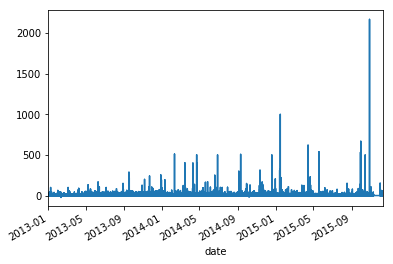

In [41]:
item_series=sales_train.loc[:,('item_cnt_day')]
item_series.plot()

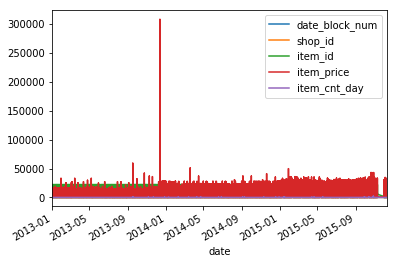

In [45]:
sales_train.plot()

In [48]:
sales_train[['shop_id','item_id','item_cnt_day']]

,shop_id,item_id,item_cnt_day
date,,,
2013-02-01,59,22154,1.0
2013-03-01,25,2552,1.0
2013-05-01,25,2552,-1.0
2013-06-01,25,2554,1.0
2013-01-15,25,2555,1.0
...,...,...,...
2015-10-10,25,7409,1.0
2015-09-10,25,7460,1.0
2015-10-14,25,7459,1.0


In [49]:
sales_train.groupby('shop_id')['item_id'].count()

shop_id
0       9857
1       5678
2      25991
3      25532
4      38242
5      38179
6      82663
7      58076
8       3412
9       3751
10     21397
11       499
12     34694
13     17824
14     36979
15     59511
16     52734
17     22950
18     53227
19     63911
20      1792
21     58133
22     45434
23      6963
24     53032
25    186104
26     53910
27    105366
28    142234
29     49225
30     50860
31    235636
32      7947
33      5027
34      5752
35     58445
36       306
37     39638
38     46013
39     13440
40      4257
41     41967
42    109253
43     39282
44     39530
45     35891
46     66321
47     56695
48     21612
49     15849
50     65173
51     44433
52     43502
53     52921
54    143480
55     34769
56     69573
57    117428
58     71441
59     42108
Name: item_id, dtype: int64

In [51]:
df=sales_train[['item_cnt_day','shop_id','item_id']].groupby(['shop_id','item_id']).count()
df.reset_index()

,shop_id,item_id,item_cnt_day
0,0,30,9
1,0,31,7
2,0,32,11
3,0,33,6
4,0,35,12
...,...,...,...
424119,59,22154,1
424120,59,22155,1
424121,59,22162,16
424122,59,22164,6


In [52]:
df=sales_train[['item_cnt_day','shop_id','item_id']].groupby(['shop_id','item_id']).sum()
df.reset_index()

,shop_id,item_id,item_cnt_day
0,0,30,31.0
1,0,31,11.0
2,0,32,16.0
3,0,33,6.0
4,0,35,15.0
...,...,...,...
424119,59,22154,1.0
424120,59,22155,1.0
424121,59,22162,16.0
424122,59,22164,6.0


In [53]:
df.max()

item_cnt_day    19934.0
dtype: float64

In [56]:
sales_train[sales_train['shop_id']==28]

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2013-05-01,0,28,7738,199.0,1.0
2013-07-01,0,28,7738,199.0,1.0
2013-01-19,0,28,7738,199.0,1.0
2013-03-01,0,28,7737,199.0,1.0
2013-04-01,0,28,7737,199.0,1.0
...,...,...,...,...,...
2015-07-10,33,28,22001,169.0,1.0
2015-10-10,33,28,22001,169.0,1.0
2015-10-15,33,28,22001,169.0,1.0


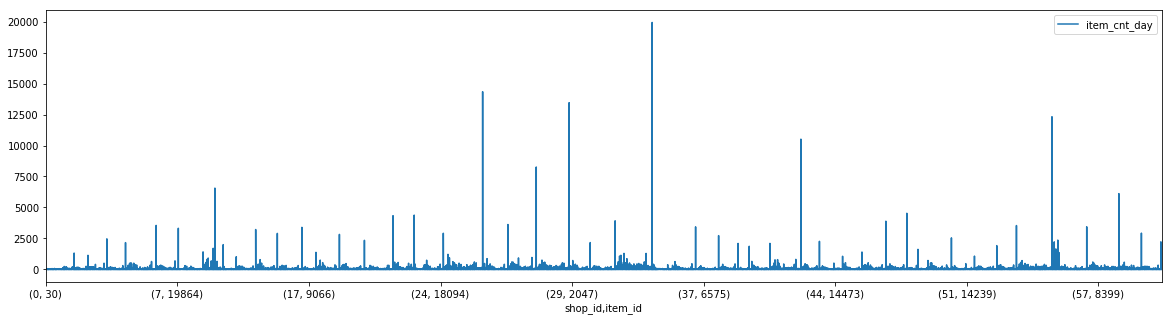

In [57]:
df.plot(figsize=(20,5))

**Feature engineering

In [60]:
dataset=sales_train.pivot_table(index=['shop_id','item_id'],values=['item_cnt_day'],columns=['date_block_num'],fill_value=0,aggfunc='sum')

In [62]:
dataset.reset_index(inplace=True)

In [63]:
dataset.head()

shop_id item_id item_cnt_day                        ...        \
date_block_num                            0   1  2  3  4  5  6  7  ... 24 25   
0                    0      30            0  31  0  0  0  0  0  0  ...  0  0   
1                    0      31            0  11  0  0  0  0  0  0  ...  0  0   
2                    0      32            6  10  0  0  0  0  0  0  ...  0  0   
3                    0      33            3   3  0  0  0  0  0  0  ...  0  0   
4                    0      35            1  14  0  0  0  0  0  0  ...  0  0   

                                        
date_block_num 26 27 28 29 30 31 32 33  
0               0  0  0  0  0  0  0  0  
1               0  0  0  0  0  0  0  0  
2               0  0  0  0  0  0  0  0  
3               0  0  0  0  0  0  0  0  
4               0  0  0  0  0  0  0  0  

[5 rows x 36 columns]

In [66]:
dataset=pd.merge(test,dataset,on=['item_id','shop_id'],how='left')

/opt/conda/lib/python3.6/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [67]:
dataset.fillna(0,inplace=True)
dataset.head()

,ID,shop_id,item_id,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
dataset.drop(['shop_id','item_id','ID'],inplace=True,axis=1)
dataset.head()

,"(item_cnt_day, 0)","(item_cnt_day, 1)","(item_cnt_day, 2)","(item_cnt_day, 3)","(item_cnt_day, 4)","(item_cnt_day, 5)","(item_cnt_day, 6)","(item_cnt_day, 7)","(item_cnt_day, 8)","(item_cnt_day, 9)",...,"(item_cnt_day, 24)","(item_cnt_day, 25)","(item_cnt_day, 26)","(item_cnt_day, 27)","(item_cnt_day, 28)","(item_cnt_day, 29)","(item_cnt_day, 30)","(item_cnt_day, 31)","(item_cnt_day, 32)","(item_cnt_day, 33)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Machine Learning

In [69]:
X_train=np.expand_dims(dataset.values[:,:-1],axis=2)

y_train=dataset.values[:,-1:]

X_test=np.expand_dims(dataset.values[:,1:],axis=2)

print(X_train.shape,y_train.shape,X_test.shape)

(214200, 33, 1) (214200, 1) (214200, 33, 1)


In [70]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

Using TensorFlow backend.


In [71]:
model=Sequential()
model.add(LSTM(units=64,input_shape=(33,1)))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mse',optimizer='adam',metrics=['mean_squared_error'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.fit(X_train,y_train,batch_size=4096,epochs=10)

Epoch 1/10
214200/214200 [==============================] - 34s 161us/step - loss: 30.6794 - mean_squared_error: 30.6794
Epoch 2/10
214200/214200 [==============================] - 33s 152us/step - loss: 30.3264 - mean_squared_error: 30.3264
Epoch 3/10
214200/214200 [==============================] - 34s 160us/step - loss: 30.1035 - mean_squared_error: 30.1035
Epoch 4/10
214200/214200 [==============================] - 34s 157us/step - loss: 29.9658 - mean_squared_error: 29.9658
Epoch 5/10
214200/214200 [==============================] - 34s 160us/step - loss: 29.8734 - mean_squared_error: 29.8734
Epoch 6/10
214200/214200 [==============================] - 31s 144us/step - loss: 29.8024 - mean_squared_error: 29.8024
Epoch 7/10
214200/214200 [==============================] - 35s 164us/step - loss: 29.7879 - mean_squared_error: 29.7879
Epoch 8/10
214200/214200 [==============================] - 32s 150us/step - loss: 29.7136 - mean_squared_error: 29.7136
Epoch 9/10
214200/214200 [======

In [73]:
sales_submission=model.predict(X_test)
sales_submission=sales_submission.clip(0.20)
submission=pd.DataFrame({'ID':test['ID'],'item_cnt_month':sales_submission.ravel()})
submission.to_csv('sales_sub.csv',index=False)

NameError: name 'test_data' is not defined